# LetsGrowMore

Name : Vishal Kumar Rajak

Task No. 02 :Stock Price Pridiction

Level : Beginner level task

# Deep Learning - Stock Market Prediction And Forecasting Using Stacked LSTM

Dataset Provided-
https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv


# Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Importing The Dataset

In [2]:
url= 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data = pd.read_csv(url)    

# Analysis

In [3]:
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [4]:
data.tail(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
data.shape

(2035, 8)

In [6]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


# Picking Up Close Column

In [10]:
data1 = data.reset_index()['Close']

In [11]:
data1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [12]:
data1.shape

(2035,)

# Visualizing

In [13]:
plt.plot(data1, color = 'magenta')
plt.title("Stacked Index View")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

Text(0, 0.5, 'Y-axis')

# Min-Max Scaler

LSTM are sensitive to the scale of the data, so using Min-Max scaler to transform the values from 0 to 1.So in order to that we need to reshape so that we can fit transform

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler(feature_range = (0,1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1,1))


# Now the data1 is transformed into an array and it now having the values between zero to one

In [16]:
data1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [17]:
data.shape

(2035, 8)

# Train Test Split

In [18]:
train_size = int(len(data)*0.65)
test_size = len(data1) - train_size
train_data, test_data = data1[0:train_size,:],data1[train_size:len(data1),:1]

In [19]:
train_size,test_size

(1322, 713)

In [20]:
train_data,test_data

(array([[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.25347222],
        [0.26041667],
        [0.2563317 ]]),
 array([[0.24652778],
        [0.23611111],
        [0.25204248],
        [0.25919118],
        [0.25776144],
        [0.2681781 ],
        [0.25449346],
        [0.27103758],
        [0.24530229],
        [0.26756536],
        [0.27267157],
        [0.26633987],
        [0.27410131],
        [0.28615196],
        [0.27818627],
        [0.27205882],
        [0.27124183],
        [0.27798203],
        [0.27083333],
        [0.25857843],
        [0.24285131],
        [0.2250817 ],
        [0.23447712],
        [0.24346405],
        [0.23611111],
        [0.22937092],
        [0.21527778],
        [0.20976307],
        [0.20751634],
        [0.2060866 ],
        [0.20445261],
        [0.20098039],
        [0.21180556],
        [0.19301471],
        [0.18974673],
        [0.20302288],
        [0.21752451],
        [0.20629085],
        [0.191584

# Data Preprocessing

Now, Splitting the data into x and y, the timestep value will be 100. In the 0th iteration the first 100 records will goes as first record and the 101 elements will be in the x. The 100 elements will be in the y

converting an array of values into a dataset matrix


In [21]:
def create_data(dataset,time_step = 1):
    dataX, dataY = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [22]:
time_step = 100
x_train, y_train = create_data(train_data,time_step)
x_test,y_test = create_data(test_data,time_step)

In [23]:
x_train

array([[0.62418301, 0.62214052, 0.62622549, ..., 0.83455882, 0.86213235,
        0.85273693],
       [0.62214052, 0.62622549, 0.63378268, ..., 0.86213235, 0.85273693,
        0.87111928],
       [0.62622549, 0.63378268, 0.62234477, ..., 0.85273693, 0.87111928,
        0.84497549],
       ...,
       [0.34517974, 0.31781046, 0.33047386, ..., 0.2816585 , 0.27001634,
        0.26531863],
       [0.31781046, 0.33047386, 0.32128268, ..., 0.27001634, 0.26531863,
        0.27389706],
       [0.33047386, 0.32128268, 0.34007353, ..., 0.26531863, 0.27389706,
        0.25347222]])

In [24]:
x_train.shape,y_train.shape

((1221, 100), (1221,))

In [25]:
x_test.shape,y_test.shape

((612, 100), (612,))

In [26]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

# Stacked LSTM

In [28]:
!pip install tensorflow

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
20/20 [==============================] - 10s 181ms/step - loss: 0.0357 - val_loss: 0.0037
Epoch 2/100
20/20 [==============================] - 2s 105ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 3/100
20/20 [==============================] - 2s 97ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 4/100
20/20 [==============================] - 2s 97ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 2s 98ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 2s 106ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/100
20/20 [==============================] - 2s 98ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/100
20/20 [==============================] - 2s 98ms/step - loss: 0.0014 - val_loss: 9.2364e-04
Epoch 9/100
20/20 [==============================] - 2s 99ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/100
20/20 [==============================] - 2s 102ms/step - loss: 0.0014 - val_los

20/20 [==============================] - 2s 97ms/step - loss: 3.5187e-04 - val_loss: 4.8705e-04
Epoch 78/100
20/20 [==============================] - 2s 109ms/step - loss: 3.3370e-04 - val_loss: 2.8743e-04
Epoch 79/100
20/20 [==============================] - 2s 106ms/step - loss: 3.4516e-04 - val_loss: 3.0877e-04
Epoch 80/100
20/20 [==============================] - 2s 116ms/step - loss: 3.3384e-04 - val_loss: 4.8382e-04
Epoch 81/100
20/20 [==============================] - 2s 113ms/step - loss: 2.8921e-04 - val_loss: 5.4575e-04
Epoch 82/100
20/20 [==============================] - 2s 111ms/step - loss: 6.0762e-04 - val_loss: 2.9418e-04
Epoch 83/100
20/20 [==============================] - 2s 98ms/step - loss: 3.1738e-04 - val_loss: 2.8307e-04
Epoch 84/100
20/20 [==============================] - 2s 99ms/step - loss: 2.9526e-04 - val_loss: 3.1687e-04
Epoch 85/100
20/20 [==============================] - 2s 116ms/step - loss: 3.7712e-04 - val_loss: 2.3624e-04
Epoch 86/100
20/20 [======

# Prediction

In [32]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [33]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [34]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

164.44374047787156

In [35]:
math.sqrt(mean_squared_error(y_test,test_predict))

114.96733801855255

# Plotting

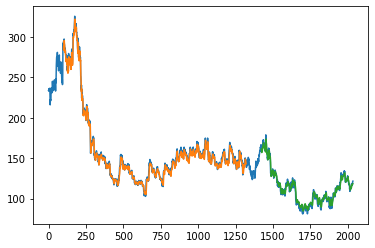

In [36]:
look_back = 100

# shift train prediction
trainPredict = np.empty_like(data1)
trainPredict[:,:] = np.nan
trainPredict[look_back:len(train_predict)+look_back, :] = train_predict

# shift test prediction
testPredict = np.empty_like(data1)
testPredict[:,:] = np.nan
testPredict[len(train_predict) + (look_back * 2)+1:len(data1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.show()